# Exploratory Data Analysis

---

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [1]:
# !pip install ipython-autotime

# %load_ext autotime

In [2]:
import scipy, os
from scipy import spatial
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
from collections import defaultdict,Counter
import operator
from tqdm import tqdm , trange
from scipy.spatial import distance

# add more imports here if you like
# ...
import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# change this line your folder where the data is found
basedir = '/content/drive/MyDrive/colab data/'

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [6]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Lock on bedroom door"", ""Carbon monoxide alar...",$59.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,12,42,62,123,2020-12-13,278,1,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36509,4.89354,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Wifi"", ""Hot water"", ""Hangers"", ""Host greets ...",$236.00,1,365,4.0,4.0,60.0,365.0,4.0,300.8,NaN,t,3,3,3,3,2020-12-13,339,31,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,100%,57%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Microwave"", ""Refrigerator"", ""Dishes and silv...",$125.00,14,180,14.0,14

## Question 1a

In [7]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Lock on bedroom door"", ""Carbon monoxide alar...",$59.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,12,42,62,123,2020-12-13,278,1,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36509,4.89354,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Wifi"", ""Hot water"", ""Hangers"", ""Host greets ...",$236.00,1,365,4.0,4.0,60.0,365.0,4.0,300.8,NaN,t,3,3,3,3,2020-12-13,339,31,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,100%,57%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Microwave"", ""Refrigerator"", ""Dishes and silv...",$125.00,14,180,14.0,14

In [8]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
  # ...
  df.drop(['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped','amenities','neighborhood_overview','picture_url','host_url','host_about','host_location','host_total_listings_count','host_thumbnail_url','host_picture_url','host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], inplace=True, axis=1)
  return df

In [9]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [10]:
def drop_cols_na(df, threshold = 0.50):
  df = df.loc[:, df.isnull().mean() < threshold]
  return df

In [11]:
df.shape

(18522, 45)

## Question 1b

In [12]:
def binary_encoding(df):
  ''' This function convert all the values that are encoded as the strings ‘t’ (for True) and ‘f’ (for False) into the integer numbers 0 and 1.
  It takes DataFrame as argument and return updated DataFrame.'''
  df.replace(to_replace= 't',value= 1,inplace= True)
  df.replace(to_replace= 'f',value= 0,inplace= True)
  return df

In [13]:
df = binary_encoding(df)

In [14]:
# hint: check Pandas to_datetime method
def add_host_days(df):
  '''This function add a column that represents the number of days (with respect to the current date).
  arugument = DataFrame
  Return = DataFrame(updated with number of days) '''
  df["host_since"]= pd.to_datetime(df["host_since"])
  current = np.datetime64(datetime.datetime.now())
  df["host_days"] = current - df.host_since
  df['host_days'] = df['host_days'].fillna(pd.Timedelta(seconds=0))
  df['host_days'] = df["host_days"].astype('timedelta64[D]').astype(int)
  return df

In [15]:
def convert_price(df):
  '''This function converts the prices into floating point numbers. 
  For instance, the string ‘$40’ is converted to the floating point number 40.0.
  arugument = DataFrame
  Return = DataFrame(updated with the prices as floating point numbers) '''
  df['price'] = df['price'].str.replace(',', '') # stripe commas
  df['price'] = df['price'].str.replace('$', '') # stripe $ sign
  df['price'] = df['price'].astype(float)
  return df

In [16]:
df = add_host_days(df)
df = convert_price(df)

## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [17]:
# How many hosts offer 2 or more properties for rent?
np.sum(df['host_listings_count'] >=2)

4172

In [18]:
# What is the highest price for a listing?
df['price'].max()

8000.0

In [19]:
# What is the ID of the listing that has the largest number of bedrooms?
df._get_value(df["bedrooms"].idxmax(),'id')

46015289

In [20]:
# What is the ID of the listing with the largest advertised price
df._get_value(df["price"].idxmax(),'id')

258273

In [21]:
# There are different room types. How many listings are there for the most common room type?
df.room_type.value_counts()

Entire home/apt    14433
Private room        3896
Hotel room           141
Shared room           52
Name: room_type, dtype: int64

In [22]:
# How many hosts are there that have been registered for more than 3000 days?
np.sum(df['host_days'] > 3000)

2799

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

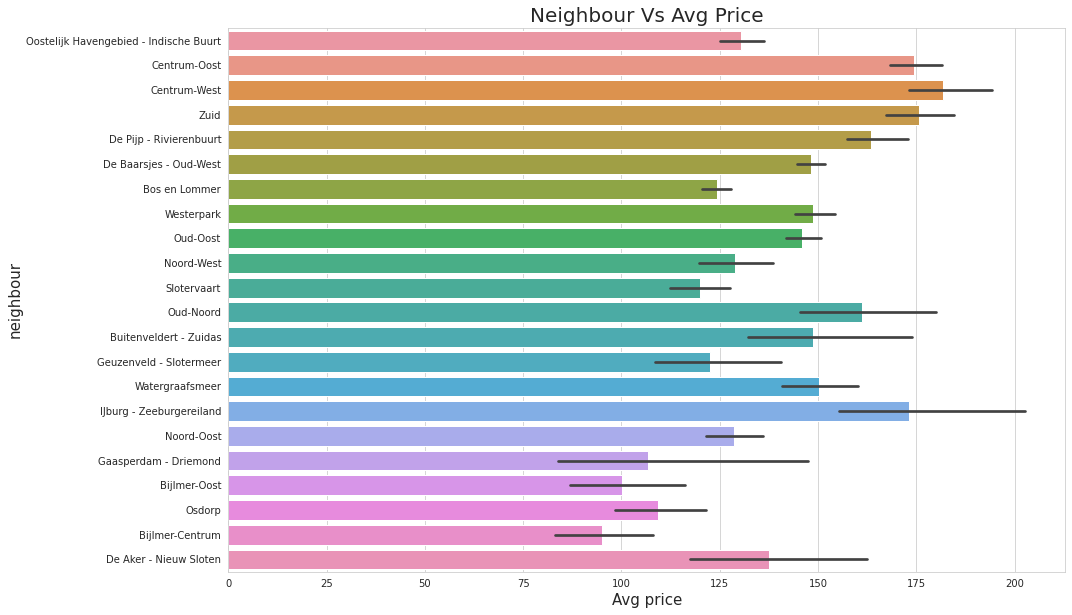

In [23]:
# your code...
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(data = df,y="neighbourhood_cleansed", x="price", estimator=np.mean)
ax.set_title('Neighbour Vs Avg Price', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax.set_ylabel("neighbour", fontsize=15)
ax.set_xlabel("Avg price", fontsize=15)
plt.show();

Plot a correlation matrix as instructed in the Coursework proforma:

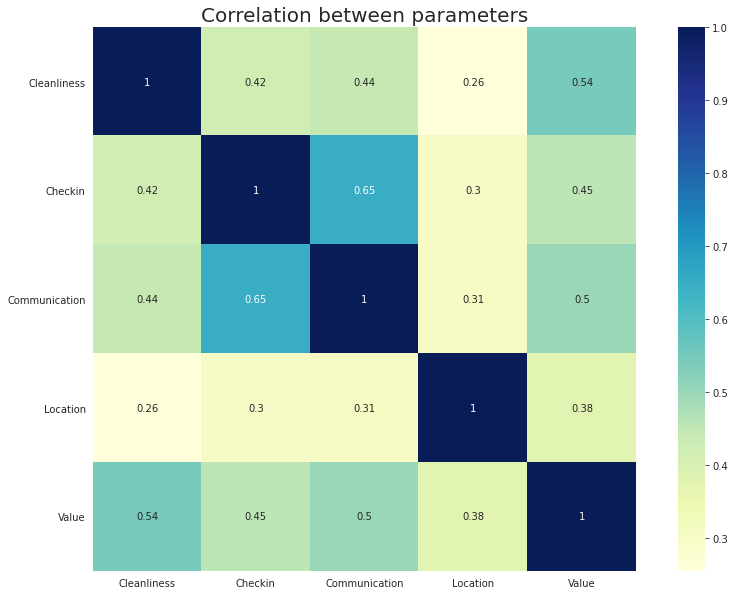

In [24]:
# your code...
plt.figure(figsize=(15,10))

x_axis_labels = ['Cleanliness','Checkin','Communication','Location','Value'] # labels for x-axis
y_axis_labels = ['Cleanliness','Checkin','Communication','Location','Value'] # labels for y axis
C = df.loc[:, 'review_scores_cleanliness':'review_scores_value'].corr()
ax = sns.heatmap(C, square=True ,annot=True,xticklabels=x_axis_labels,yticklabels=y_axis_labels,cmap="YlGnBu")
ax.set_title("Correlation between parameters", fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 10);

Plot a geographical distribution as instructed in the Coursework proforma:

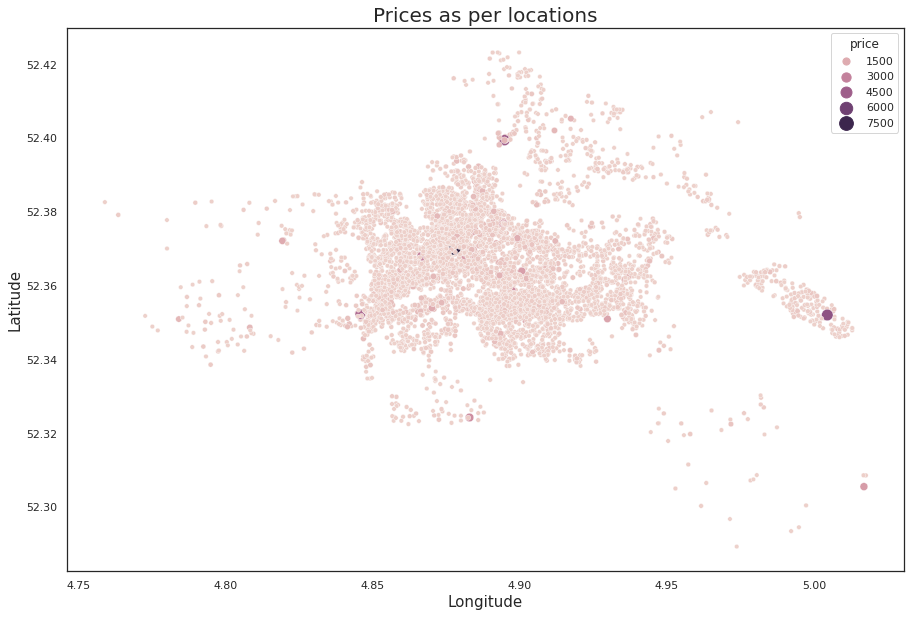

In [25]:
# your code...
df_price = df[df['price']>150]
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    data=df_price, y='latitude', x='longitude', hue="price", size="price",
    sizes=(20, 200))
ax.set_title("Prices as per locations", fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax.set_ylabel("Latitude", fontsize=15)
ax.set_xlabel("Longitude", fontsize=15)
plt.show();

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [26]:
# deal with nan values replacing with MEAN
Column_list=df[["review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","review_scores_rating"]]
 
# df_pred
for col in Column_list:
 Mean= int (Column_list[col].mean())
 Column_list[col].fillna((Mean), inplace=True)
Linear_Regression=Column_list
Linear_Regression.columns=["accuracy","cleanliness","checkin","communication","location","value","rating"]
 
fit=sm.OLS.from_formula("rating~accuracy+cleanliness+checkin+communication+location+value",Linear_Regression).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5943.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:01:58   Log-Likelihood:                -50787.
No. Observations:               18522   AIC:                         1.016e+05
Df Residuals:                   18515   BIC:                         1.016e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.0992      0.507     29.783

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): The rooms combos with significantly different prices were Entire Home/Hotel, Entire Home/Private, Entire Home/Shared, Hotel/Shared.

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): with bonferroni correction Entire Home/Private and Hotel/Private were the only room combos with significantly different prices


In [27]:
# your t-test code...
df_Private_room=df[df.room_type=='Private room']["price"].dropna()
df_Entire_home=df[df.room_type=='Entire home/apt']["price"].dropna()
df_Hotel_room=df[df.room_type=='Hotel room']["price"].dropna()
df_Shared_room=df[df.room_type=='Shared room']["price"].dropna()
 
# it's significant when < 0.01 (alpha)
pr_vs_eh=('{:.5f}'.format(float(ttest_ind(df_Private_room,df_Entire_home).pvalue)))
pr_vs_hr=('{:.5f}'.format(float(ttest_ind(df_Private_room, df_Hotel_room).pvalue)))
pr_vs_sr=('{:.5f}'.format(float(ttest_ind(df_Private_room, df_Shared_room).pvalue)))
eh_vs_hr=('{:.5f}'.format(float(ttest_ind(df_Entire_home, df_Hotel_room).pvalue)))
eh_vs_sr=('{:.5f}'.format(float(ttest_ind(df_Entire_home, df_Shared_room).pvalue)))
hr_vs_sr=('{:.5f}'.format(float(ttest_ind(df_Hotel_room, df_Shared_room).pvalue)))
 
table=[
 [0,pr_vs_eh,pr_vs_hr,pr_vs_sr],
 [pr_vs_eh,0,eh_vs_hr,eh_vs_sr],
 [pr_vs_hr,eh_vs_hr,0,hr_vs_sr],
 [pr_vs_sr,eh_vs_sr,hr_vs_sr,0]
]
 
p_table=pd.DataFrame(table,index=['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],columns=['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'])
p_table

,Private room,Entire home/apt,Hotel room,Shared room
Private room,0,0.00000,0.00006,0.45169
Entire home/apt,0.00000,0,0.00293,0.00218
Hotel room,0.00006,0.00293,0,0.31212
Shared room,0.45169,0.00218,0.31212,0


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: ...

In [28]:
newData=df.drop(['id','name','host_id','host_since','host_name','first_review','last_review'], axis = 1).fillna(0)
tmp = pd.get_dummies(newData[['neighbourhood_cleansed','property_type','room_type']])
tmp.head()
newData=pd.concat([newData,tmp], axis=1)
newData=newData.drop(['neighbourhood_cleansed','property_type'],axis=1)
newCols=list(newData.columns)
newCols.remove('price')
new_Data=newData.drop('price',axis=1)

In [29]:
def variable_selection(newData,predictors, target,alpha=0.01):
  '''
  This function take argument as Dataframe , list of columns , target variable and alpha value.
  return : list of variables 
  '''
  predictors = []
  included = list(predictors)
  adjRsquared=0
  while True:
    changed=False
    # forward step
    excluded = list(set(newData.columns)-set(included))
    new_pval = pd.Series(index=excluded)
    for new_column in excluded:                                   # going through the loop with each column.
      model = sm.OLS(target, sm.add_constant(pd.DataFrame(newData[included+[new_column]]))).fit()
      new_pval[new_column] = model.pvalues[new_column]
      adjRsquared=model.rsquared
      best_pval = new_pval.min()
      if best_pval < alpha:                                       # comparing obtained p value with alpha value
        best_feature = new_pval.argmin()
        sel=new_pval.index.values.tolist()[new_pval.argmin()]
        included.append(sel)
        changed=True
  
    if not changed:               # if included list is not changed then it will come out of loop.
      break
  
  return included

In [ ]:
variable_selection(new_Data,newCols,newData.price,0.01)

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [31]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):
  ''' 
  This function recommend neightbourhood to the user by taking consideration of below arguments:
  argument : DataFrame , budget_min (float number),budget_max (float number),relative (boolean value)
  return   : neighbourhood name(string value)
  '''
  # neighbourhood list to all the neighbours 
  neighb_list = ['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
        'Centrum-West', 'Zuid', 'De Pijp - Rivierenbuurt',
        'De Baarsjes - Oud-West', 'Bos en Lommer', 'Westerpark',
        'Oud-Oost', 'Noord-West', 'Slotervaart', 'Oud-Noord',
        'Buitenveldert - Zuidas', 'Geuzenveld - Slotermeer',
        'Watergraafsmeer', 'IJburg - Zeeburgereiland', 'Noord-Oost',
        'Gaasperdam - Driemond', 'Bijlmer-Oost', 'Osdorp',
        'Bijlmer-Centrum', 'De Aker - Nieuw Sloten'] 
  neighb_hood = []
  for i in tqdm(df['neighbourhood_cleansed']):
    neighb_hood.append(i)
    dic_neigh = dict(Counter(neighb_hood))
    dic_neigh_sorted = dict(sorted(dic_neigh.items(),key=operator.itemgetter(1),reverse=True))
  min_bud = float(budget_min)
  max_bud = float(budget_max)
  
  sorted_large_dic = {}
  large_dic = {}
  lst_large_neigh = []
  for count, value in enumerate(df['price']):
    if value in np.arange(min_bud,max_bud):
      lst_large_neigh.append(df['neighbourhood_cleansed'][count])
      large_dic=dict(Counter(lst_large_neigh))
      sorted_large_dic=dict(sorted(large_dic.items(),key=operator.itemgetter(1),reverse=True))
  ab_result = (next(iter(sorted_large_dic)))    # calculating absolute value and storing it in dictionary
  def checkKey(dic, key):
    ''' This function checks whether key is present in dictionary or not 
            argument : dictionary , key (string)
            return   : int '''
    if key in dic.keys():
      val = dic[key]
    else:
      val = 0
    return val      
  rel_dic = {}
  for i in neighb_list:                   # iterating through the list of all neighbours in dataframe
    ab = 0
    rl = 0
    ab = checkKey(sorted_large_dic,i)
    rel = checkKey(dic_neigh_sorted,i)
    rel_val = float(ab/rel)               # calculating relative value
    rel_dic.update({i:rel_val})           # updating the relative value in dictionary
    sort_rel_dic = dict(sorted(rel_dic.items(),key=operator.itemgetter(1),reverse=True))
  rel_result = next(iter(sort_rel_dic))

  if relative is True:                    # checking if user requires relative or absolute value
    return rel_result
  elif relative is False:
    return ab_result

In [32]:
recommend_neighbourhood(df,50,100,False)

100%|██████████| 18522/18522 [00:10<00:00, 1691.84it/s]


'De Baarsjes - Oud-West'

### Price recommender for hosts

In [33]:
def recommend_price(df, latitude, longitude,n_neighbours, room_t = None):
  ''' 
  This function recommend price to the user by taking consideration of below arguments:
  argument : DataFrame , latitude (float number),longitude (float number),n_neighbours(integer), room type(string)
  return   : average nighty price (float)
  '''
  pd.options.mode.chained_assignment = None
  room_list = ['Private room', 'Entire home/apt', 'Hotel room', 'Shared room',None] # room type user is allowed to enter
  if room_t in room_list:  
    df['distance'] = 0.000
    user_loc = (latitude,longitude)              # converting user input location into 1D array 
    for i in tqdm(range(len(df.longitude))):
      lat = df['latitude'][i]
      lon = df['longitude'][i]
      host_loc = (lat,lon)
      df['distance'][i] = distance.euclidean(user_loc, host_loc)   # calculating euclidean distance and storing it in new column
    if room_t == None:
      df_sorted = df.sort_values('distance')           # sorting distance to find the closest property
      df_sorted = df_sorted[0:n_neighbours]
      price_mean = df_sorted['price'].mean()
      return price_mean
    else:
      df_room = df[df.room_type.eq(room_t)]            # sorting dataframe according to the room type 
      df_room = df_room.sort_values('distance')
      df_room = df_room[0:n_neighbours]                # triming dataframe according to the number of neighbours 
      room_price_mean = df_room['price'].mean()        # calculating mean value of price.
      return room_price_mean
  else:
    return 'room type not defined'                     # if user enter room type that is not defined/ none then return this string 

In [34]:
recommend_price(df, 52.3674, 4.9612, 10, 'Entire home/apt')

100%|██████████| 18522/18522 [00:02<00:00, 7695.80it/s]


113.8